In [44]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [110]:
trainData = pd.read_csv("StockTrainingData.csv")
testData = pd.read_csv("StockTestingData.csv")

In [14]:
trainData.columns

Index(['id', 'last_price', 'mid', 'transacted_qty', 'bid1', 'bid2', 'bid3',
       'bid4', 'bid5', 'ask1', 'ask2', 'ask3', 'ask4', 'ask5', 'bid1vol',
       'bid2vol', 'bid3vol', 'bid4vol', 'bid5vol', 'ask1vol', 'ask2vol',
       'ask3vol', 'ask4vol', 'ask5vol', 'y'],
      dtype='object')

In [15]:
trainData.describe()

,id,last_price,mid,transacted_qty,bid1,bid2,bid3,bid4,bid5,ask1,...,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol,y
count,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000,...,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000
mean,296189.500000,3965.639532,3965.639078,2.390106,3965.446863,3965.209031,3964.985168,3964.763521,3964.542642,3965.831294,...,4.906759,5.314979,5.601242,5.930859,3.887878,4.913441,5.309274,5.611319,5.927790,0.356958
std,171005.520568,81.801597,81.801148,3.781083,81.795678,81.789472,81.783336,81.776174,81.768015,81.806745,...,5.098520,5.411883,5.731617,6.256011,4.505598,5.432179,5.920962,6.505823,6.975328,0.479103
min,0.000000,3812.000000,3812.100000,0.000000,3811.800000,3811.600000,3811.400000,3811.200000,3811.000000,3812.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,148094.750000,3896.400000,3896.400000,0.000000,3896.200000,3896.000000,3895.800000,3895.600000,3895.200000,3896.600000,...,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,296189.500000,3983.800000,3983.700000,1.000000,3983.600000,3983.200000,3983.000000,3982.800000,3982.600000,3983.800000,...,3.000000,4.000000,4.000000,4.000000,2.000000,3.000000,4.000000,4.000000,4.000000,0.000000
75%,444284.250000,4039.600000,4039.500000,3.000000,4039.400000,4039.000000,4038.800000,4038.600000,4038.400000,4039.800000,...,6.000000,7.000000,7.000000,7.000000,5.000000,6.000000,6.000000,7.000000,7.000000,1.000000
max,592379.000000,4115.800000,4116.000000,311.000000,4115.800000,4115.600000,4115.000000,4114.800000,4114.600000,4116.200000,...,139.000000,136.000000,119.000000,120.000000,130.000000,132.000000,133.000000,134.000000,135.000000,1.000000


In [27]:
entireData = pd.concat([trainData, testData],sort=False)
entireData.set_index("id", inplace = True)

In [28]:
entireData.dropna(inplace=True)
entireData

,last_price,mid,transacted_qty,bid1,bid2,bid3,bid4,bid5,ask1,ask2,...,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol,y
id,,,,,,,,,,,,,,,,,,,,,
0,3842.4,3842.6,103.0,3842.4,3842.0,3841.8,3841.0,3840.4,3842.8,3843.4,...,1,6,14,6,6,1,1,10,2,1.0
1,3842.8,3843.4,55.0,3843.0,3842.8,3842.4,3842.0,3841.8,3843.8,3844.0,...,6,11,1,6,1,4,4,1,13,0.0
2,3844.0,3844.3,84.0,3843.8,3843.6,3843.2,3843.0,3842.8,3844.8,3845.0,...,1,4,21,12,1,16,10,4,9,0.0
3,3843.8,3843.4,37.0,3843.0,3842.8,3842.4,3842.0,3841.4,3843.8,3844.0,...,13,12,2,4,2,7,1,2,11,1.0
4,3843.2,3843.1,41.0,3842.8,3842.4,3842.0,3841.8,3841.4,3843.4,3844.0,...,12,2,2,4,1,3,1,11,15,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592375,4110.2,4110.3,2.0,4110.2,4110.0,4109.4,4109.2,4109.0,4110.4,4111.8,...,2,1,3,2,2,3,10,7,7,1.0
592376,4109.4,4110.5,11.0,4109.2,4109.0,4108.6,4108.2,4108.0,4111.8,4112.0,...,2,2,6,5,3,9,7,7,5,0.0
592377,4109.4,4110.5,0.0,4109.2,4109.0,4108.6,4108.2,4108.0,4111.8,4112.0,...,2,2,6,5,3,9,7,7,5,0.0


In [29]:
X = entireData.drop('y',axis=1).values
y = entireData['y'].values

In [30]:
entireData.y = entireData.y.astype(int)
entireData.dtypes

last_price        float64
mid               float64
transacted_qty    float64
bid1              float64
bid2              float64
bid3              float64
bid4              float64
bid5              float64
ask1              float64
ask2              float64
ask3              float64
ask4              float64
ask5              float64
bid1vol             int64
bid2vol             int64
bid3vol             int64
bid4vol             int64
bid5vol             int64
ask1vol             int64
ask2vol             int64
ask3vol             int64
ask4vol             int64
ask5vol             int64
y                   int32
dtype: object

In [31]:
statistical_features = entireData.groupby('id', as_index=False).agg({
    'last_price':['min','median','max','sum','std'],
    'mid':['min','median','max','sum','std'],
    'transacted_qty':['min','median','max','sum','std'],
    'bid1':['min','median','max','sum'],
    'bid1vol' : ['nunique', 'count'],
    'ask1' : ['min','median','max','sum'],
    'ask1vol' : ['nunique', 'count']
})

In [32]:
statistical_features

last_price                                 mid                          \
              min  median     max     sum std     min  median     max     sum   
0          3842.4  3842.4  3842.4  3842.4 NaN  3842.6  3842.6  3842.6  3842.6   
1          3842.8  3842.8  3842.8  3842.8 NaN  3843.4  3843.4  3843.4  3843.4   
2          3844.0  3844.0  3844.0  3844.0 NaN  3844.3  3844.3  3844.3  3844.3   
3          3843.8  3843.8  3843.8  3843.8 NaN  3843.4  3843.4  3843.4  3843.4   
4          3843.2  3843.2  3843.2  3843.2 NaN  3843.1  3843.1  3843.1  3843.1   
...           ...     ...     ...     ...  ..     ...     ...     ...     ...   
592375     4110.2  4110.2  4110.2  4110.2 NaN  4110.3  4110.3  4110.3  4110.3   
592376     4109.4  4109.4  4109.4  4109.4 NaN  4110.5  4110.5  4110.5  4110.5   
592377     4109.4  4109.4  4109.4  4109.4 NaN  4110.5  4110.5  4110.5  4110.5   
592378     4109.4  4109.4  4109.4  4109.4 NaN  4110.5  4110.5  4110.5  4110.5   
592379     4109.4  4109.4  4109.4  4109.4 NaN  4110.5  4110.5  4110.5  4110.5   

            ...    bid1         bid1vol          ask1                          \
       std  ...     max     sum nunique count     min  median     max     sum   
0      NaN  ...  3842.4  3842.4       1     1  3842.8  3842.8  3842.8  3842.8   
1      NaN  ...  3843.0  3843.0       1     1  3843.8  3843.8  3843.8  3843.8   
2      NaN  ...  3843.8  3843.8       1     1  3844.8  3844.8  3844.8  3844.8   
3      NaN  ...  3843.0  3843.0       1     1  3843.8  3843.8  3843.8  3843.8   
4      NaN  ...  3842.8  3842.8       1     1  3843.4  3843.4  3843.4  3843.4   
...     ..  ...     ...     ...     ...   ...     ...     ...     ...     ...   
592375 NaN  ...  4110.2  4110.2       1     1  4110.4  4110.4  4110.4  4110.4   
592376 NaN  ...  4109.2  4109.2       1     1  4111.8  4111.8  4111.8  4111.8   
592377 NaN  ...  4109.2  4109.2       1     1  4111.8  4111.8  4111.8  4111.8   
592378 NaN  ...  4109.2  4109.2       1     1  4111.8  4111.8  4111.8  4111.8   
592379 NaN  ...  4109.2  4109.2       1     1  4111.8  4111.8  4111.8  4111.8   

       ask1vol        
       nunique count  
0            1     1  
1            1     1  
2            1     1  
3            1     1  
4            1     1  
...        ...   ...  
592375       1     1  
592376       1     1  
592377       1     1  
592378       1     1  
592379       1     1  

[592380 rows x 27 columns]

<AxesSubplot:>

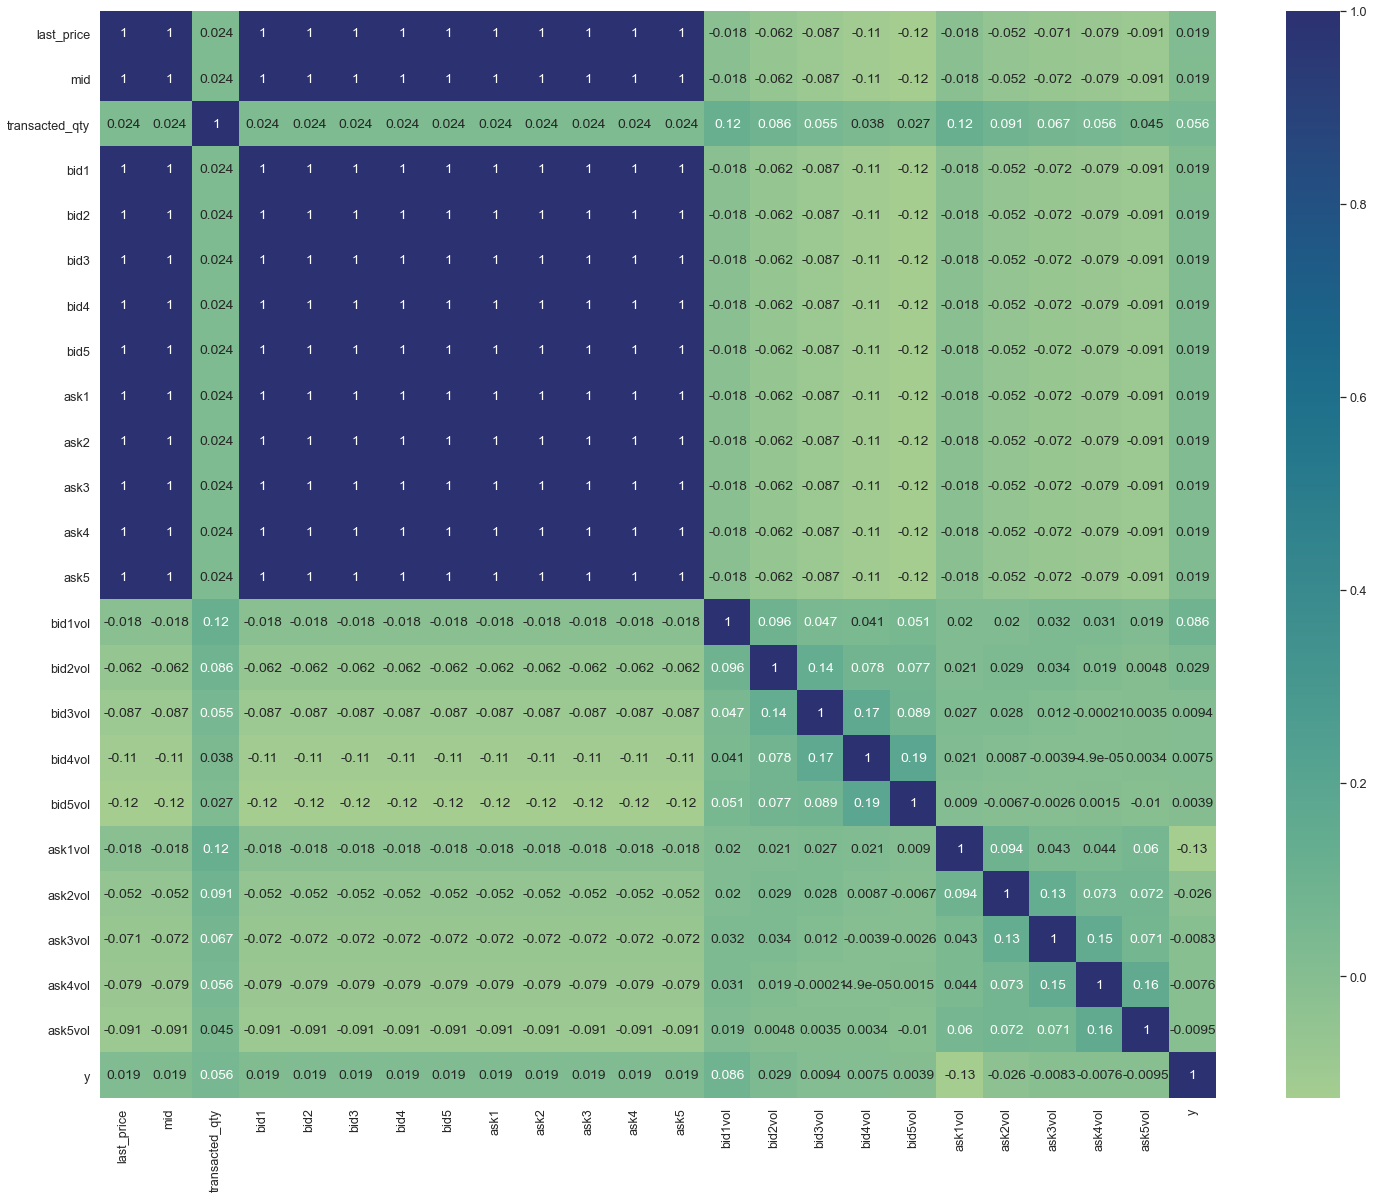

In [33]:
correlation = entireData.corr()
plt.figure(figsize=(25,20))
sns.set(font_scale=1.15)
sns.heatmap(correlation, annot=True,cmap='crest')

<AxesSubplot:>

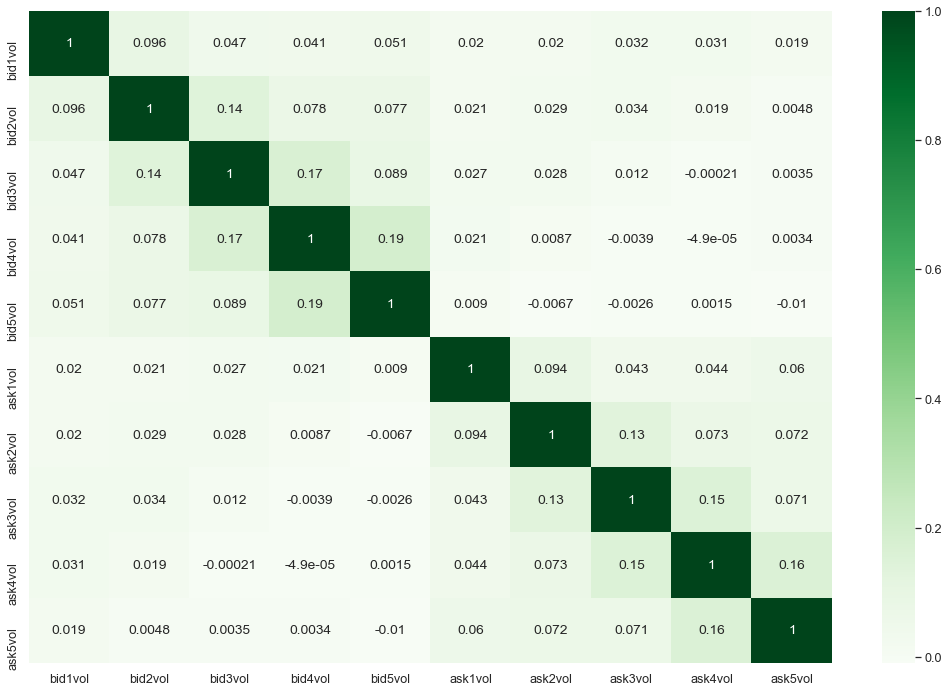

In [69]:
correlation = entireData[['bid1vol','bid2vol','bid3vol','bid4vol','bid5vol','ask1vol','ask2vol','ask3vol','ask4vol','ask5vol']].corr()
plt.figure(figsize=(18,12))
sns.set(font_scale=1.15)
sns.heatmap(correlation, annot=True,cmap='Greens')

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

normalization = MinMaxScaler(feature_range=(-1,1))
normalization.fit(X_train)

X_train_normalized = normalization.transform(X_train)
X_test_normalized = normalization.transform(X_test)

sample_X_train = X_train[0:1000]
sample_y_train = y_train[0:1000]

Feature Ranking:
1. Feature# 13 (0.057820)
2. Feature# 22 (0.054445)
3. Feature# 19 (0.054050)
4. Feature# 16 (0.052949)
5. Feature# 15 (0.052885)
6. Feature# 18 (0.052863)
7. Feature# 17 (0.050254)
8. Feature# 20 (0.049717)
9. Feature# 14 (0.049044)
10. Feature# 21 (0.046204)
11. Feature# 2 (0.043045)
12. Feature# 6 (0.038046)
13. Feature# 1 (0.038016)
14. Feature# 11 (0.037722)
15. Feature# 5 (0.037621)
16. Feature# 3 (0.036989)
17. Feature# 12 (0.036311)
18. Feature# 0 (0.036190)
19. Feature# 10 (0.035681)
20. Feature# 4 (0.035342)
21. Feature# 7 (0.035197)
22. Feature# 9 (0.035033)
23. Feature# 8 (0.034576)


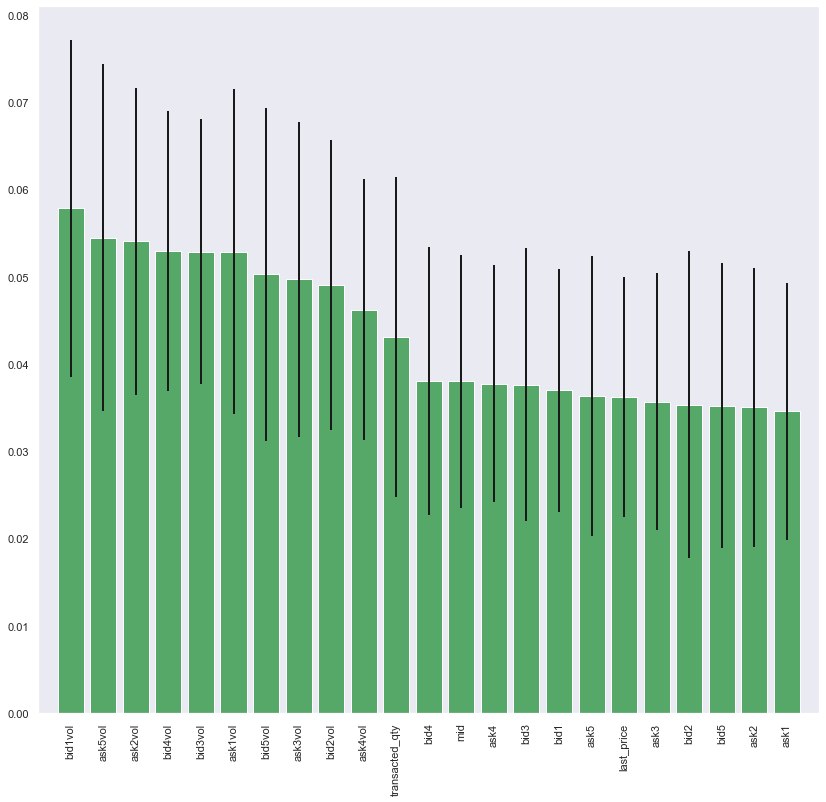

In [125]:
trainDataSample = trainData.sample(n=1000)
trainDataSample.set_index("id", inplace = True)

X = trainDataSample.iloc[:,0:23]
y = trainDataSample.iloc[:,-1]

from sklearn.ensemble import RandomForestClassifier

clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X,y)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature Ranking:")

for f in range(X.shape[1]):
    print("%d. Feature# %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(1, figsize=(14, 13))
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
#plt.ser_axis_bg_color('blue')
plt.show()

In [126]:
X_train_normalized

array([[ 0.16895604,  0.17021277, -1.        , ..., -1.        ,
        -0.94174757, -0.96969697],
       [ 0.25824176,  0.26012354, -0.92      , ..., -1.        ,
        -0.9223301 , -0.87878788],
       [ 0.69642857,  0.69663693, -0.84      , ..., -0.64705882,
        -0.98058252, -0.96969697],
       ...,
       [-0.86126374, -0.86135896, -1.        , ..., -0.82352941,
        -0.94174757, -0.87878788],
       [ 0.91071429,  0.91214825, -0.6       , ..., -0.82352941,
        -0.96116505, -1.        ],
       [ 0.67994505,  0.67741935, -1.        , ..., -0.94117647,
        -0.96116505, -0.87878788]])

In [127]:
X_test_normalized

array([[ 0.50961538,  0.50652025, -1.        , ..., -0.88235294,
        -0.80582524, -0.93939394],
       [ 0.29945055,  0.29787234, -0.84      , ..., -0.23529412,
        -0.98058252, -1.        ],
       [ 0.02884615,  0.02814001, -0.92      , ..., -0.88235294,
        -0.74757282, -0.6969697 ],
       ...,
       [-0.46291209, -0.46053535, -0.92      , ..., -0.64705882,
        -0.94174757, -0.96969697],
       [ 0.43681319,  0.43788607, -0.92      , ..., -0.94117647,
        -0.96116505, -1.        ],
       [-0.51923077, -0.52024708, -1.        , ..., -0.82352941,
        -1.        , -1.        ]])

In [128]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.svm import LinearSVC

from sklearn.ensemble import RandomForestClassifier

In [132]:
randomForestCLF = RandomForestClassifier(max_depth=5, random_state=0)
randomForestCLF.fit(X_train_normalized,y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [ ]:
prediction = randomForestCLF.predict(X_test_normalized)
print(accuracy_score(y_test,prediction))

In [ ]:
neuralNetCLF = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
neuralNetCLF.fit(X_train_normalized, y_train)

In [ ]:
svmCLF = LinearSVC(C=1)
svmCLF.fit(X_train_normalized,y_train)